In [1]:
import pandas as pd
import numpy as np
from itertools import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import re
import string
import unidecode
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import text 
import re

In [2]:
def add_newline(text):
    def Sentences(text):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(text)
        return sentenceList
    
    content = Sentences(text)[:2]
    new = "<br>".join(content)
    new = re.sub('<br> ', '<br>', new)
    
    return new

In [3]:
import plotly.tools as tls
tls.set_credentials_file(username="pfan",
                             api_key="nvzyukyl5g")
credentials = tls.get_credentials_file()

import plotly.plotly as py
from plotly.graph_objs import *

In [4]:
# topics_keyterms = pd.read_csv('topics_keyterms.csv')
# topics = topics_keyterms.transpose()
# topics.columns = topics.ix[0]
# topics = topics.ix[1:]

In [4]:
hilary_topics = pd.read_csv('../data/hilary_topics.csv')
hilary_topics.head()
hilary_topics['pos_percent'] = hilary_topics['pos_num']/hilary_topics['pos_num'].sum()
hilary_topics['pos_percent']
hilary_topics['neg_percent'] = hilary_topics['neg_num']/hilary_topics['neg_num'].sum()
hilary_topics['neg_percent']

hilary_topics['pos_ex1'] = hilary_topics['pos_ex'].apply(lambda x: add_newline(x))
hilary_topics['neg_ex1'] = hilary_topics['neg_ex'].apply(lambda x: add_newline(x))

,Unnamed: 0,pos_num,pos_keys,pos_ex,neg_num,neg_keys,neg_ex
0,0,133,president hillary woman america rodham,Ms. Hillary Rodham Clinton is the MOST QUALIFI...,100,biden joe run president obama,A Joe Biden run would effectively be a third O...
1,1,161,email server private state information,I think the press should cut Clinton some slac...,149,times story news coverage clinton,"I'm a lukewarm fan of Mrs. Clinton, certainly ..."
2,2,182,times coverage story ny page,I don't trust the NY Times political coverage ...,54,black matter lives blm apology,"Until Charles M. Blow and the ""Black Lives Mat..."
3,3,205,biden joe run clinton president,Nothing -- well almost nothing -- could make m...,193,sanders bernie support hillary democrat,"Dismissing Bernie Sanders as a socialist, as t..."
4,4,293,sanders bernie hillary support clinton,It would be nice to read an article about Bern...,85,clintons bushes sick tired barry,"No more Bushes, no more Clintons."


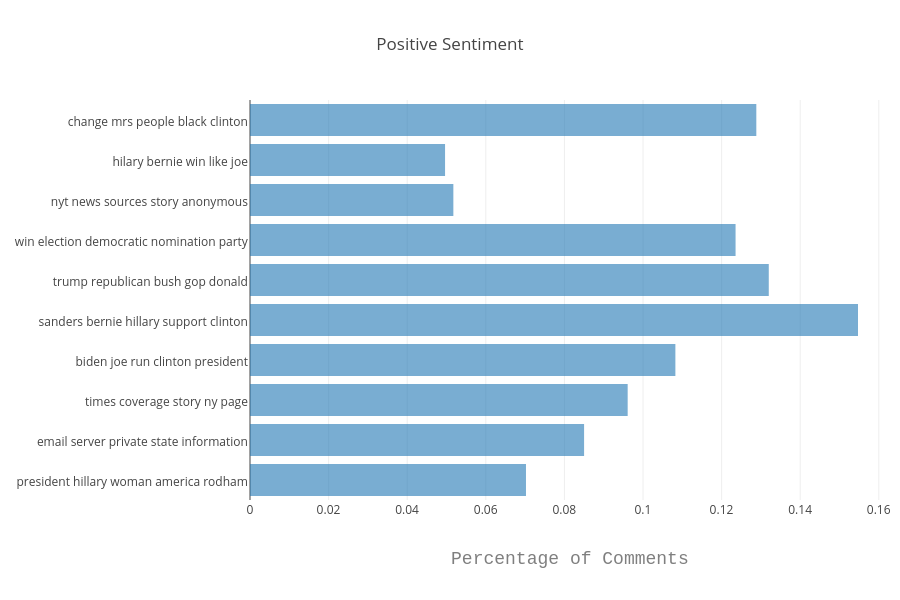

In [10]:
data = Data([
    Bar(
        y=hilary_topics['pos_keys'],
        x=hilary_topics['pos_percent'],
        text=hilary_topics['pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Proportion of comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        r=10,      #   right,  
        l=250#   left
    ),
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='hilary_pos')

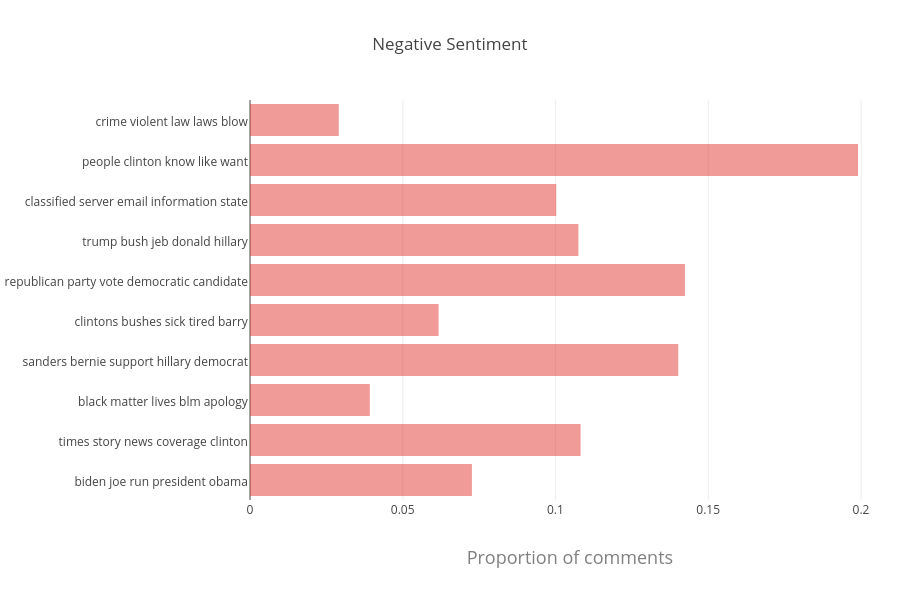

In [13]:
data = Data([
    Bar(
        y=hilary_topics['neg_keys'],
        x=hilary_topics['neg_percent'],
        text=hilary_topics['neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Proportion of comments',
        titlefont=Font(
            family='Open Sans',
            size=18,
            color='#000000'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
  
    )


fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='hilary_neg')

In [15]:
sanders_topics = pd.read_csv('../data/sanders_topics.csv')
sanders_topics.head()


,Unnamed: 0,index,sanders_pos,sanders_neg,Pos_num,Neg_num,sanders_pos_ex,sanders_neg_ex,pos_percent,neg_percent,sanders_pos_ex1,sanders_neg_ex1
0,0,topic1,vote primary ll election general bernie hope r...,hillary clinton sanders issues just doesn ll g...,109,46,Bernie Sanders is getting my vote in the Democ...,As a Democrat sick of the Clintons who is NOT ...,0.062357,0.104784,Bernie Sanders is getting my vote in the Democ...,As a Democrat sick of the Clintons who is NOT ...
1,1,topic2,love bernie sanders fight stands good believes...,truth say guts reality senators sanders power ...,86,27,Much LOVE to Bernie.,"The reality is, Sanders is one of the few Sena...",0.049199,0.061503,Much LOVE to Bernie<br>,"The reality is, Sanders is one of the few Sena..."
2,2,topic3,people tax class country american pay middle m...,vote chance getting bernie nomination little k...,278,42,The mention in the article that Sanders would ...,I'll give Bernie my vote and my time although ...,0.159039,0.095672,The mention in the article that Sanders would ...,I'll give Bernie my vote and my time although ...
3,3,topic4,win good lose want bernie luck don nomination ...,bernie great small just thing politician candi...,127,65,Sanders can win most definitely win.End negat...,"Dear Gail,Great ideas, but too many jokes here...",0.072654,0.148064,Sanders can win most definitely win<br>End ne...,"Dear Gail,Great ideas, but too many jokes here..."
4,4,topic5,senator sanders mr good wish agree times ameri...,senator acknowledged sanders candidate courage...,147,32,It's a fact that most Americans agree with Sen...,I commend Senator Sanders for his personal int...,0.084096,0.072893,It's a fact that most Americans agree with Sen...,I commend Senator Sanders for his personal int...


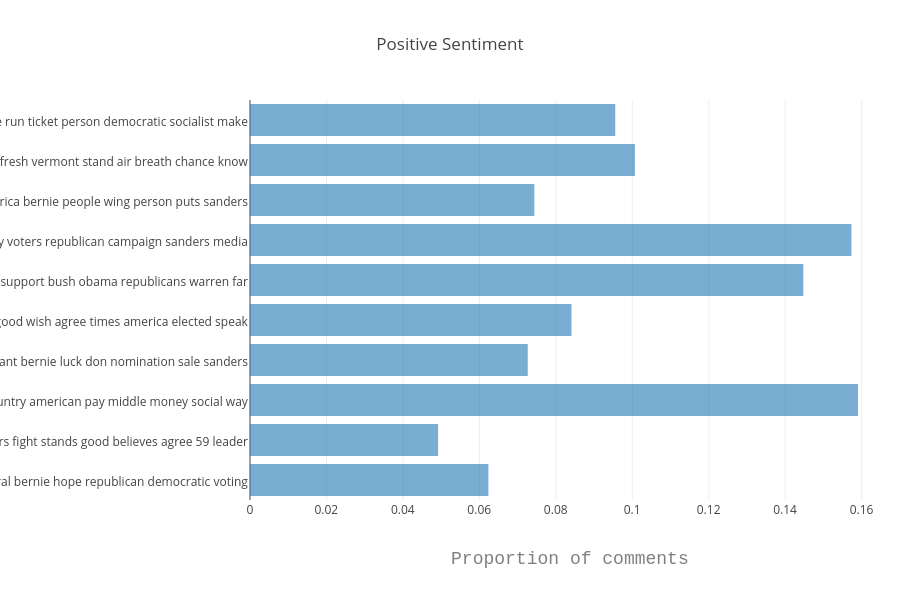

In [18]:
data = Data([
    Bar(
        y=sanders_topics['sanders_pos'],
        x=sanders_topics['pos_percent'],
        text=sanders_topics['sanders_pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Proportion of comments',
        titlefont=Font(
            family='Open Sans',
            size=18,
            color='#000000'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        r=10,      #   right,  
        l=250#   left
    ),
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Open Sans',
            size=18,
            color='#000000'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='sanders_pos')

In [ ]:
data = Data([
    Bar(
        y=sanders_topics['sanders_neg'],
        x=sanders_topics['neg_percent'],
        text=sanders_topics['sanders_neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Proportion of comments',
        titlefont=Font(
            family='Open Sans',
            size=18,
            color='#000000'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
  
    )


fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='sanders_neg')


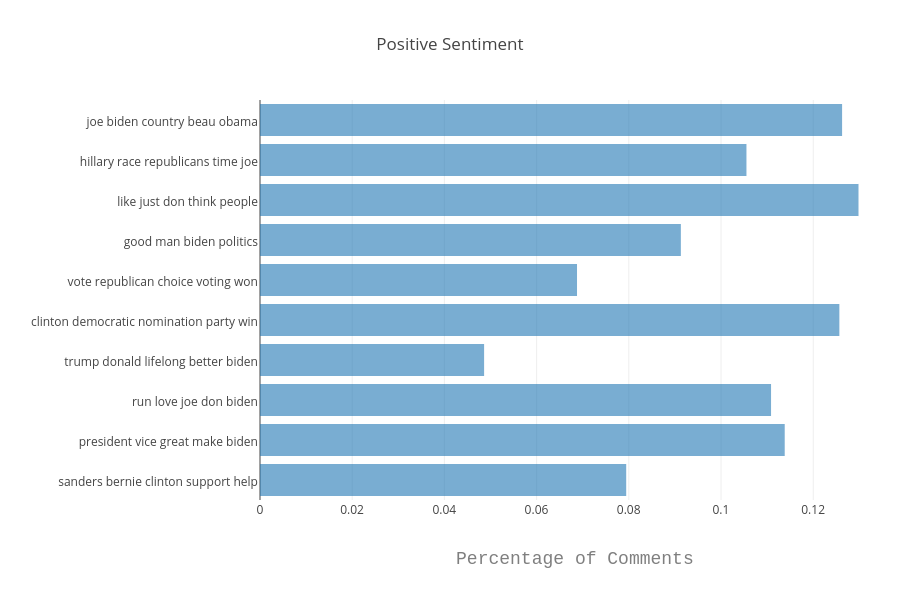

In [42]:
data = Data([
    Bar(
        y=data['biden_pos_keys'],
        x=data['pos_percent'],
        text=data['biden_pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=260,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='biden_pos')

In [45]:
data = pd.read_csv('data/biden_topics.csv')

In [46]:
data.drop('Unnamed: 0', axis =1, inplace=True)
data['pos_percent'] = data['Pos_num']/data['Pos_num'].sum()
data['pos_percent']
data['neg_percent'] = data['Neg_num']/data['Neg_num'].sum()
data['neg_percent']

data['biden_pos_ex1'] = data['biden_pos_ex'].apply(lambda x: add_newline(x))
data['biden_neg_ex1'] = data['biden_neg_ex'].apply(lambda x: add_newline(x))
#biden_topics.to_csv('data/biden_topics1.csv')

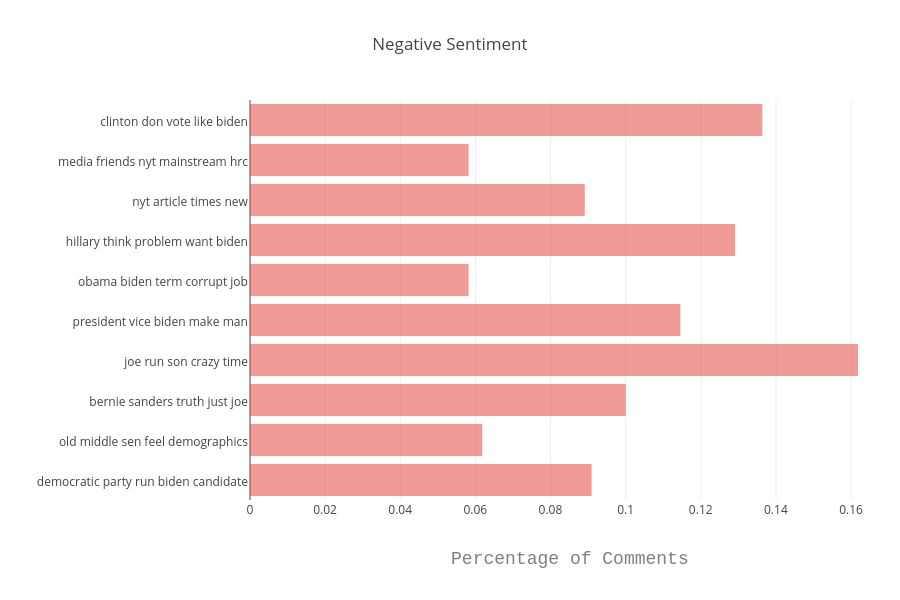

In [48]:
data = Data([
    Bar(
        y=data['biden_neg_keys'],
        x=data['neg_percent'],
        text=data['biden_neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='biden_neg')

In [61]:
data = pd.read_csv('data/trump_topics.csv')
data.columns

Index([u'Unnamed: 0', u'pos_num', u'pos_keys', u'pos_ex', u'neg_num',
       u'neg_keys', u'neg_ex'],
      dtype='object')

In [62]:
data.drop('Unnamed: 0', axis =1, inplace=True)
data['pos_percent'] = data['pos_num']/data['pos_num'].sum()
data['pos_percent']
data['neg_percent'] = data['neg_num']/data['neg_num'].sum()
data['neg_percent']

data['pos_ex1'] = data['pos_ex'].apply(lambda x: add_newline(x))
data['neg_ex1'] = data['neg_ex'].apply(lambda x: add_newline(x))
#biden_topics.to_csv('data/biden_topics1.csv')

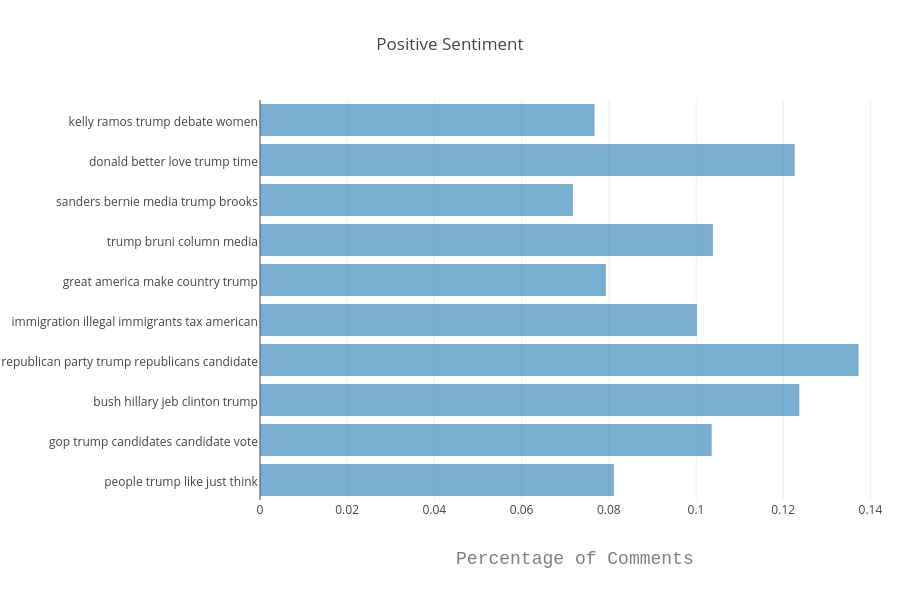

In [52]:
data = Data([
    Bar(
        y=data['trump_pos_keys'],
        x=data['pos_percent'],
        text=data['trump_pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=260,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='trump_pos')

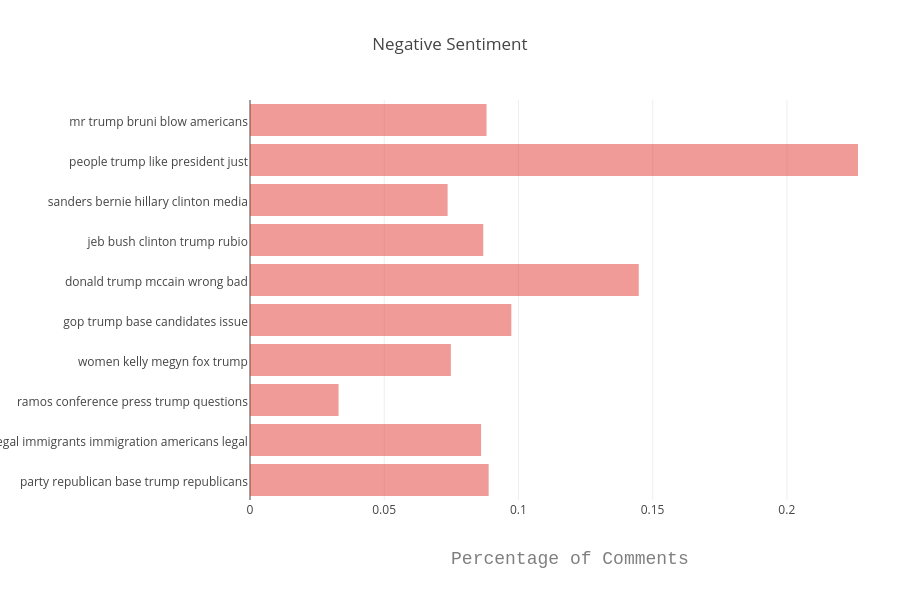

In [63]:
data = Data([
    Bar(
        y=data['neg_keys'],
        x=data['neg_percent'],
        text=data['neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='trump_neg')

In [5]:
data = pd.read_csv('data/bush_topics.csv')
data.drop('Unnamed: 0', axis =1, inplace=True)
data['pos_percent'] = data['pos_num']/data['pos_num'].sum()
data['pos_percent']
data['neg_percent'] = data['neg_num']/data['neg_num'].sum()
data['neg_percent']

data['pos_ex1'] = data['pos_ex'].apply(lambda x: add_newline(x))
data['neg_ex1'] = data['neg_ex'].apply(lambda x: add_newline(x))
#biden_topics.to_csv('data/biden_topics1.csv')

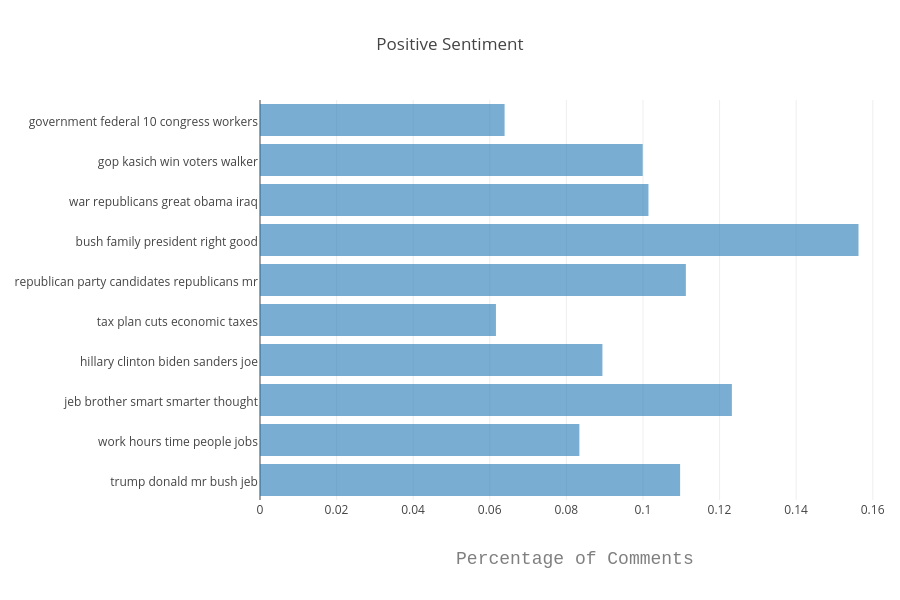

In [6]:
data = Data([
    Bar(
        y=data['pos_keys'],
        x=data['pos_percent'],
        text=data['pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=260,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='bush_pos')

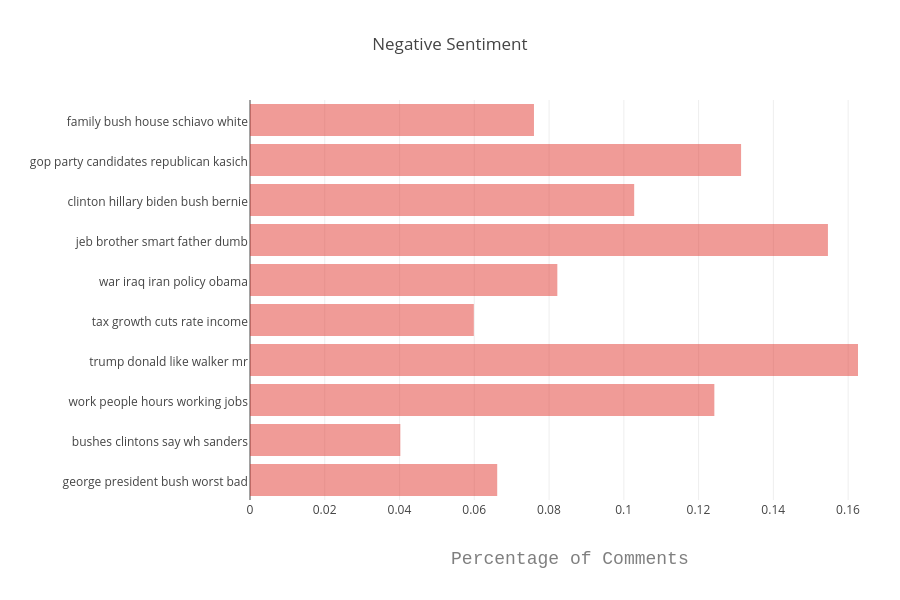

In [67]:
data = Data([
    Bar(
        y=data['neg_keys'],
        x=data['neg_percent'],
        text=data['neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='bush_neg')

In [8]:
data = pd.read_csv('data/carson_topics.csv')
data.drop('Unnamed: 0', axis =1, inplace=True)
data['pos_percent'] = data['pos_num']/data['pos_num'].sum()
data['neg_percent'] = data['neg_num']/data['neg_num'].sum()

In [9]:
def clean_text(text):
    text= text.replace('mrs. ','')
    text= text.replace('mr. ','')
    text= text.replace('ms. ','')
    text= text.replace('dr. ','')
    text= text.replace('Dr.','')
    text= text.replace('Sen. ','')
    text= text.replace('Mrs. ','')
    return text


In [10]:
data['pos_ex'] = data['pos_ex'].apply(lambda x : clean_text(x))
data['neg_ex'] = data['neg_ex'].apply(lambda x : clean_text(x))


In [11]:
data['pos_ex1'] = data['pos_ex'].apply(lambda x: add_newline(x))
data['neg_ex1'] = data['neg_ex'].apply(lambda x: add_newline(x))
#biden_topics.to_csv('data/biden_topics1.csv')

In [16]:
data.head()

,pos_num,pos_keys,pos_ex,neg_num,neg_keys,neg_ex,pos_percent,neg_percent,pos_ex1,neg_ex1
0,77,bush cruz rubio paul trump,"Your view of who ""won"" the debate largely depe...",54,dr carson poor government just,Carson is a fine doctor; one of the best. Th...,0.101316,0.111111,"Your view of who ""won"" the debate largely depe...",Carson is a fine doctor; one of the best<br> ...
1,107,president obama dr carson experience,Oh my goodness! I am listening to Rush going o...,46,sanders bernie trump brooks senator,"""These four anti-party men have little experie...",0.140789,0.094650,Oh my goodness<br>I am listening to Rush going...,"""These four anti-party men have little experie..."
2,64,tax 10 people pay 000,"Hmmmmm...you make $20,000, have a kid and live...",65,black party white republican gop,Carson has a Obama proem with the GOP base: h...,0.084211,0.133745,Hmmmmm<br>,Carson has a Obama proem with the GOP base: h...
3,31,climb flaming said liberal success,Quote: Carson said he was a “flaming liberal...,19,students high junior far right,Thank you New York Times for your insightful c...,0.040789,0.039095,Quote: Carson said he was a “flaming liberal...,Thank you New York Times for your insightful c...
4,76,science evolution scientist gay carson,Happy to see you back Gail!My only comment to ...,9,kasich vis biggest huckabee times,Biggest winner: John Kasich. Kasich could esse...,0.100000,0.018519,Happy to see you back Gail<br>My only comment ...,Biggest winner: John Kasich<br>Kasich could es...


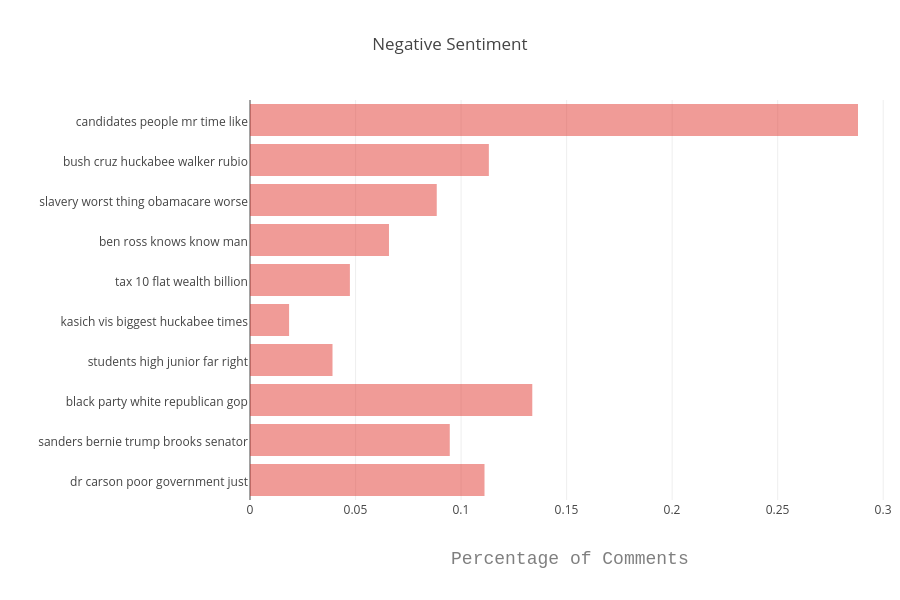

In [17]:
data = Data([
    Bar(
        y=data['neg_keys'],
        x=data['neg_percent'],
        text=data['neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='carson_neg')

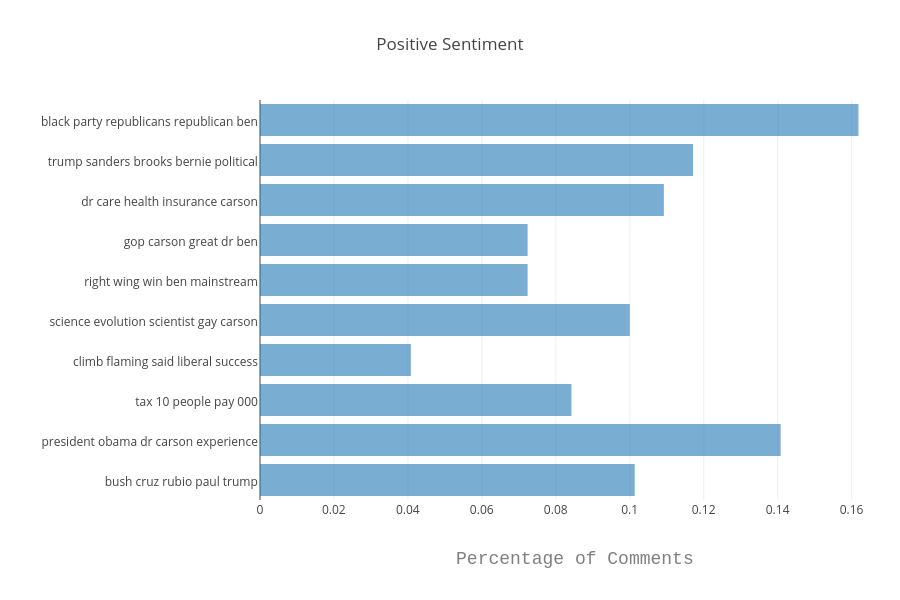

In [142]:
data1 = Data([
    Bar(
        y=data['pos_keys'],
        x=data['pos_percent'],
        text=data['pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=260,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='carson_pos')

In [25]:
import datetime 
def unix_convert(x):
    return pd.to_datetime(datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [28]:
unix_convert(1267232235)

Timestamp('2010-02-26 16:57:15')

In [27]:
raw = pd.read_csv('../data/sanders_meta.csv')
raw.head()

,Unnamed: 0,Comment,URL,Recommendations,Locations,EditorPick,userID,date
0,0,"""When. Will. They. Learn?"" Never! It's in th...",http://thecaucus.blogs.nytimes.com/2010/02/26/...,6,"Sacramento, CA",False,25550072,1267232235
1,1,There is absolutely nothing sacrosanct or uniq...,http://thecaucus.blogs.nytimes.com/2010/02/26/...,46,Centerville Iowa,False,42837060,1267232297
2,2,Michael<br /><br />I agree with this part of y...,http://thecaucus.blogs.nytimes.com/2010/02/26/...,12,US,False,40252372,1267233814
3,3,Maybe they're trying to win an Academy Award.<...,http://thecaucus.blogs.nytimes.com/2010/02/26/...,2,Planet Earth,False,47595073,1267233909
4,4,"For a very long time, textbooks in the South a...",http://thecaucus.blogs.nytimes.com/2010/02/26/...,16,Portland,False,8264296,1267233920


In [45]:
import pandas as pd
import datetime
import numpy as np
def period_convert(x):
    return pd.to_datetime(datetime.datetime.fromtimestamp(x).strftime('%Y-%m'))

def unix_convert(x):
    return datetime.datetime.fromtimestamp(x).strftime('%Y')

In [51]:
data = pd.read_csv('../data/carson_scores.csv') #sanders and carson
data[pd.isnull(data['Comment'])] = ""
data.info()
data['date'] = data['date'].apply(lambda x : period_convert(x))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22032 entries, 0 to 22031
Data columns (total 15 columns):
Unnamed: 0         22032 non-null object
Unnamed: 0.1       22032 non-null object
Comment            22032 non-null object
URL                22031 non-null object
Recommendations    22031 non-null object
Locations          22031 non-null object
EditorPick         22031 non-null object
userID             22031 non-null object
date               22031 non-null object
Sentiment          22032 non-null object
Sentiment_raw      22032 non-null object
State              11410 non-null object
City               17822 non-null object
latitude           11408 non-null object
longitude          11408 non-null object
dtypes: object(15)

ValueError: timestamp out of range for platform localtime()/gmtime() function

In [48]:
data['new_date'] = data['date'].apply(lambda x : period_convert(x))

ValueError: timestamp out of range for platform localtime()/gmtime() function

In [27]:
unix_convert(1426703299)

'2015'

In [26]:
data['date']

0     1426703299
1     1421326405
2     1441878227
3     1429185787
4     1426704337
5     1426703686
6     1421327109
7     1421333842
8     1421327115
9     1421327103
10    1421326455
11    1441878658
12    1441878656
13    1441878627
14    1441878461
...
22017    1291393273
22018    1291387029
22019    1291387617
22020    1291392570
22021    1291386720
22022    1291376638
22023    1291348490
22024    1291343167
22025    1291334585
22026    1291333470
22027    1291333948
22028    1291328601
22029    1291328524
22030    1291327509
22031    1291327413
Name: date, Length: 22032, dtype: float64